Sci-Kit import test

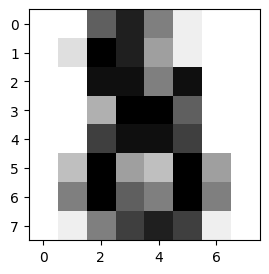

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

TASK

Accuracy: 98.33%


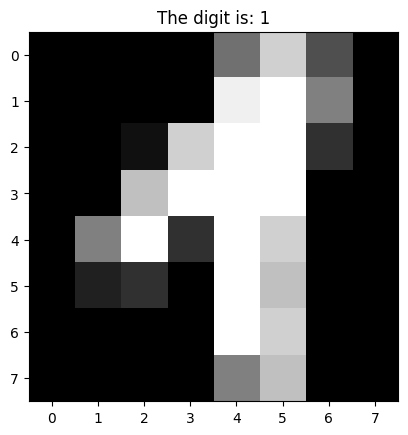

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the classifier
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Function to classify a new image
def classify_image(image):
    image_flat = image.flatten().reshape(1, -1)
    prediction = knn.predict(image_flat)
    return prediction[0]

# Example: Classifying a sample from the dataset
import random

sample_image = random.choice(X_test).reshape(8, 8)
plt.imshow(sample_image, cmap='gray')
plt.title(f'The digit is: {classify_image(sample_image)}')
plt.show()

Using my own Dataset

In [ ]:
import cv2
import numpy as np
import os

def load_data(data_dir):
    features = []
    labels = []
    for label in range(10):  # For each digit 0-9
        digit_dir = os.path.join(data_dir, str(label))
        for filename in os.listdir(digit_dir):
            img_path = os.path.join(digit_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))  # Resize to a fixed size
            features.append(img.flatten())  # Flatten the image to a vector
            labels.append(label)
    return np.array(features), np.array(labels)

features, labels = load_data('dataset')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and fit the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can choose k based on your requirement
knn.fit(X_train, y_train)

# Test the classifier
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
def classify_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize to match training images
    img_flat = img.flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = knn.predict(img_flat)
    return prediction[0]

# Example usage
result = classify_image('test_image.png')
print(f'The digit is: {result}')